In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Let's create an empty dictionary to store the data.
shooting_dic ={}

In [4]:
#Let's open the file, you have to be familiar with the content of the data in order to deal with it.
df = pd.read_csv(r'Shooting-2018-2019.csv')
#let's explore the data
print(df)

   Unnamed: 0 Unnamed: 1 Unnamed: 2 Standard Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0       Squad       # Pl        90s      Gls         Sh        SoT       SoT%   
1     Al-Ahli         36         30       67        413        167       40.4   
2    Al-Hilal         30         30       66        491        189       38.5   
3  Al-Ittihad         40         30       44        450        150       33.3   
4    Al-Nassr         31         30       66        446        166       37.2   
5   Al-Shabab         31         30       39        453        160       35.3   

  Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0      Sh/90     SoT/90       G/Sh       G/SoT        Dist          PK   
1      13.77       5.57       0.14        0.35         NaN           8   
2      16.37        6.3       0.11        0.29         NaN          12   
3         15          5       0.09        0.27         NaN           3   
4      14.87       5.53       0.13        0.35         NaN    

In [5]:
#I'm going now to assign values into the dictionary, for my case I will do something like {'Al-Hilal': '2018-2019':[data_here]}
#Initializing an itirator 
i=1
for team in df["Unnamed: 0"][1:]:
    shooting_dic[team] = {}
    shooting_dic[team]["2018-2019"] = []
    for column in df.columns[3:11]:
        shooting_dic[team]["2018-2019"].append(df[column][i])
    i +=1
#Let's print it and see the contents.
print(shooting_dic)

{'Al-Ahli': {'2018-2019': ['67', '413', '167', '40.4', '13.77', '5.57', '0.14', '0.35']}, 'Al-Hilal': {'2018-2019': ['66', '491', '189', '38.5', '16.37', '6.3', '0.11', '0.29']}, 'Al-Ittihad': {'2018-2019': ['44', '450', '150', '33.3', '15', '5', '0.09', '0.27']}, 'Al-Nassr': {'2018-2019': ['66', '446', '166', '37.2', '14.87', '5.53', '0.13', '0.35']}, 'Al-Shabab': {'2018-2019': ['39', '453', '160', '35.3', '15.1', '5.33', '0.08', '0.23']}}


In [6]:
#Great, now let's do this over again and add the stats of another seasons, we could implement a function for that purpose, but since I have only the stats of 3 seasons, I will repeate the process.
df = pd.read_csv(r'Shooting-2019-2020.csv')
i = 1
for key in shooting_dic.keys():
    shooting_dic[key]["2019-2020"] = []
    for column in df.columns[3:11]:
        shooting_dic[key]["2019-2020"].append(df[column][i])
    i +=1
print(shooting_dic)
print()

df = pd.read_csv(r'Shooting-2020-2021.csv')
i = 1
for key in shooting_dic.keys():
    shooting_dic[key]["2020-2021"] = []
    for column in df.columns[3:11]:
        shooting_dic[key]["2020-2021"].append(df[column][i])
    i +=1
print(shooting_dic)

{'Al-Ahli': {'2018-2019': ['67', '413', '167', '40.4', '13.77', '5.57', '0.14', '0.35'], '2019-2020': ['48', '421', '148', '35.2', '14.03', '4.93', '0.1', '0.3']}, 'Al-Hilal': {'2018-2019': ['66', '491', '189', '38.5', '16.37', '6.3', '0.11', '0.29'], '2019-2020': ['73', '422', '179', '42.4', '14.07', '5.97', '0.14', '0.34']}, 'Al-Ittihad': {'2018-2019': ['44', '450', '150', '33.3', '15', '5', '0.09', '0.27'], '2019-2020': ['41', '321', '125', '38.9', '10.7', '4.17', '0.11', '0.27']}, 'Al-Nassr': {'2018-2019': ['66', '446', '166', '37.2', '14.87', '5.53', '0.13', '0.35'], '2019-2020': ['60', '512', '191', '37.3', '17.07', '6.37', '0.1', '0.27']}, 'Al-Shabab': {'2018-2019': ['39', '453', '160', '35.3', '15.1', '5.33', '0.08', '0.23'], '2019-2020': ['38', '379', '133', '35.1', '12.63', '4.43', '0.09', '0.26']}}

{'Al-Ahli': {'2018-2019': ['67', '413', '167', '40.4', '13.77', '5.57', '0.14', '0.35'], '2019-2020': ['48', '421', '148', '35.2', '14.03', '4.93', '0.1', '0.3'], '2020-2021': ['

In [7]:
#Now, I will get the number of goals scored by the big five teams and save'em in a lists.
seasons = ["2018-2019","2019-2020","2020-2021"]
goals_ahli = [int(shooting_dic[key][season][0]) for key in list(shooting_dic.keys())[:1] for season in shooting_dic[key]]
goals_hilal = [int(shooting_dic[key][season][0]) for key in list(shooting_dic.keys())[1:2] for season in shooting_dic[key]]
goals_ittihad = [int(shooting_dic[key][season][0]) for key in list(shooting_dic.keys())[2:3] for season in shooting_dic[key]]
goals_nasr = [int(shooting_dic[key][season][0]) for key in list(shooting_dic.keys())[3:4] for season in shooting_dic[key]]
goals_shabab = [int(shooting_dic[key][season][0]) for key in list(shooting_dic.keys())[4:] for season in shooting_dic[key]]

In [8]:
#Let's implement a function to make the values appear on the graph.
def display_values(x_values,y_values):
    for x, y in zip(x_values, y_values):
        label = "{:}".format(y)

        plt.annotate(label,  # this is the text
                     (x, y),  # this is the point to label
                     textcoords="offset points",  # how to position the text
                     xytext=(0, 10),  # distance from text to points (x,y)
                     ha='center')  # horizontal alignment can be left, right or center

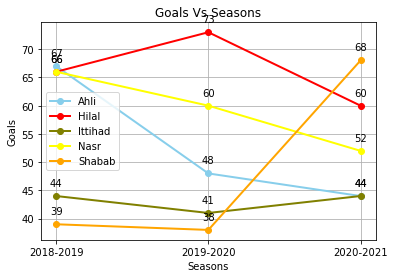

In [9]:
#Now, let's visualize that with line chart.
df=pd.DataFrame({'x_values': seasons, 'y1_values':goals_ahli, 'y2_values': goals_hilal, 'y3_values': goals_ittihad, 'y4_values': goals_nasr, 'y5_values': goals_shabab})
plt.plot( 'x_values', 'y1_values', data=df, marker='o', color='skyblue', linewidth=2, label="Ahli")
plt.plot( 'x_values', 'y2_values', data=df, marker='o', color='red', linewidth=2, label="Hilal")
plt.plot( 'x_values', 'y3_values', data=df, marker='o', color='olive', linewidth=2, label="Ittihad")
plt.plot( 'x_values', 'y4_values', data=df, marker='o', color='yellow', linewidth=2, label="Nasr")
plt.plot( 'x_values', 'y5_values', data=df, marker='o', color='orange', linewidth=2, label="Shabab")
plt.legend()
plt.title('Goals Vs Seasons')
plt.xlabel('Seasons')
plt.ylabel('Goals')
plt.grid(True)
display_values(seasons,goals_ahli)
display_values(seasons,goals_hilal)
display_values(seasons,goals_ittihad)
display_values(seasons,goals_nasr)
display_values(seasons,goals_shabab)
plt.show()

In [ ]:
#Can you spot one intersting thing in the graph?? Hint: maybe it's associated with singing an Argentinian player!🤩 